# Classification 

In this tutorial we are going to give a brief overview of classification and apply it to a use case in Cardiovascular MRI.

The tutorial is subdivided into 3 hands-on tutorials:

1. Performing a simple logistic regression model using Tensorflow (no images).
2. Constructing a simple classification model (CNN), which takes as input an image and returns a probability class.
3. Toy example: Preparing a small dataset with 'short axis' data and 'other orientation' data, fitting the classification model, evaluating the model on a test set.

> **Tip**: if you are running this in Google Colab, you can enable GPU computation by clicking on **Runtime > Change runtime type** and selecting **GPU** under **Hardware accelerator**. This will significantly speed up training of neural networks.


## Logistic regression using TensorFlow

We apply the concepts of machine learning to a simple problem: **logistic regression**. 

While in linear regression, we aim to solve: 
$$y = wx + b$$
where $w$ is the slope of the line, called **weight**, and $b$ is the intercept, called **bias**.

In logistic regression, as previously explained we aim to solve a slightly different problem: 
$$y = h(wx + b)$$
where $h$ is the sigmoid function $h(𝐰⋅𝐱+𝑏)=1/(1+exp(−(𝐰⋅𝐱+𝑏)))$

In [2]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

We define a distribution of points which are either from class 1 or 0. 
In this case (Easy Distribution) the class 1 and 0 are nicely separated using a single feature. 
A human would easily separate the two classes intuitively assigning the classes (if Feature>50 green, else red)

Text(0.5, 1.0, 'Logistic Regression')

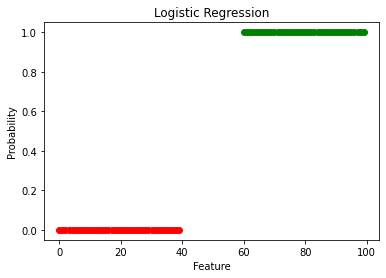

In [3]:
#Easy distribution (Perfect Feature)
x=np.concatenate((np.arange(0,40),np.arange(60,100)))
y=np.zeros(x.shape)
y[x.shape[0]//2:]=1
x2=np.arange(0,100)

plt.figure()
plt.plot(x[y==0],y[y==0],'ro')
plt.plot(x[y>0],y[y>0],'go')
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.title('Logistic Regression')

Now let's create a basic ML model and fit a sigmoid function mapping the input to the probability it belongs to class 1.

In [4]:
model = tf.keras.Sequential()
number_of_classes = 1
number_of_features = 1 
model.add(tf.keras.layers.Dense(number_of_classes,activation = 'sigmoid',input_dim = number_of_features))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
loss= 'binary_crossentropy'

model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
history = model.fit(x, y, epochs=1000,batch_size=5)

Epoch 1/1000


2022-08-19 10:44:55.881052: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-19 10:44:55.915961: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-19 10:44:55.916118: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-19 10:44:55.916899: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

16/16 [==============================] - 1s 1ms/step - loss: 13.5071 - accuracy: 0.5125
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 11.9867 - accuracy: 0.5125
Epoch 3/1000
16/16 [==============================] - 0s 874us/step - loss: 10.4575 - accuracy: 0.5125
Epoch 4/1000
16/16 [==============================] - 0s 768us/step - loss: 9.0715 - accuracy: 0.5125
Epoch 5/1000
16/16 [==============================] - 0s 798us/step - loss: 7.5433 - accuracy: 0.5125
Epoch 6/1000
16/16 [==============================] - 0s 953us/step - loss: 6.0677 - accuracy: 0.5250
Epoch 7/1000
16/16 [==============================] - 0s 863us/step - loss: 4.7132 - accuracy: 0.5375
Epoch 8/1000
16/16 [==============================] - 0s 832us/step - loss: 3.2247 - accuracy: 0.5375
Epoch 9/1000
16/16 [==============================] - 0s 867us/step - loss: 1.9045 - accuracy: 0.5625
Epoch 10/1000
16/16 [==============================] - 0s 873us/step - loss: 0.6728 - accuracy: 

Once trained, we need to assess the results. If the model is learning correctly, we should see the loss becoming lower over time. The `history` object returned by `model.fit` holds information about the loss for each epoch. Let's use it to plot the loss over time.

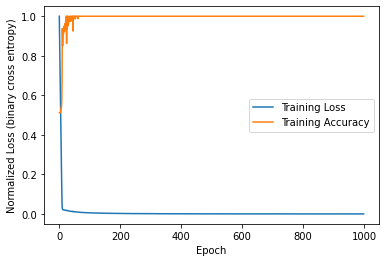

In [5]:
plt.plot(history.history['loss']/np.max(history.history['loss']),label='Training Loss')
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Normalized Loss (binary cross entropy)')
plt.legend()
plt.show()

In [27]:
#Prediction
output=[]
x2=np.arange(0,100)

for inputs in x2:
    output.append(model(tf.expand_dims(inputs,axis=0)))

plt.figure()
plt.plot(x[y==0],y[y==0],'ro')
plt.plot(x[y>0],y[y>0],'go')
plt.plot(x2,np.stack(output)[:,0,0],'k--')
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.title('Logistic Regression \n Easy case fit: w=' +str(model.get_weights()[0])[2:-7]+'  b='+str(model.get_weights()[1])[2:-5])


ValueError: Exception encountered when calling layer "sequential_2" (type Sequential).

Input 0 of layer "conv2d_8" is incompatible with the layer: expected min_ndim=4, found ndim=1. Full shape received: (1,)

Call arguments received:
  • inputs=tf.Tensor(shape=(1,), dtype=int64)
  • training=None
  • mask=None

Here there is no ambiguity, and the model is perfectly classifying all points.

### Harder Distribuiton

In the next exemple the feature is less discriminating. Meaning that it cannot fully separate the two classes with certainty.

You want to intuitively set the separation to a similar value although with much more uncertainty towards the middle.

We perform the same fitting procedure to this new distribution

Text(0.5, 1.0, 'Logistic Regression')

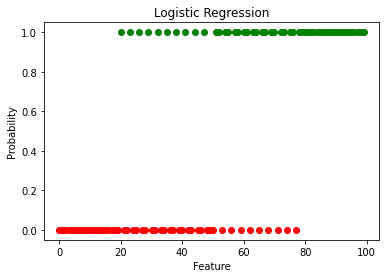

In [7]:
#Harder Distribution (Imperfect Feature)
x2=np.arange(0,100)
y2=np.zeros(x2.shape)
y2[50:]=1
y2[20:80:3]+=1
y2=y2%2

plt.figure()
plt.plot(x2[y2==0],y2[y2==0],'ro')
plt.plot(x2[y2>0],y2[y2>0],'go')
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.title('Logistic Regression')

In [8]:
history2=model.fit(x2, y2, epochs=1000,batch_size=5)

Epoch 1/1000
20/20 [==============================] - 0s 764us/step - loss: 1.6697 - accuracy: 0.7700
Epoch 2/1000
20/20 [==============================] - 0s 827us/step - loss: 1.4968 - accuracy: 0.7800
Epoch 3/1000
20/20 [==============================] - 0s 771us/step - loss: 1.4219 - accuracy: 0.7900
Epoch 4/1000
20/20 [==============================] - 0s 755us/step - loss: 1.3843 - accuracy: 0.7900
Epoch 5/1000
20/20 [==============================] - 0s 895us/step - loss: 1.4231 - accuracy: 0.7700
Epoch 6/1000
20/20 [==============================] - 0s 797us/step - loss: 1.4874 - accuracy: 0.8000
Epoch 7/1000
20/20 [==============================] - 0s 748us/step - loss: 1.3881 - accuracy: 0.7800
Epoch 8/1000
20/20 [==============================] - 0s 730us/step - loss: 1.3626 - accuracy: 0.7900
Epoch 9/1000
20/20 [==============================] - 0s 693us/step - loss: 1.5011 - accuracy: 0.7700
Epoch 10/1000
20/20 [==============================] - 0s 707us/step - loss: 1.572

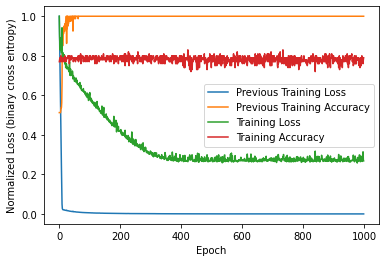

In [9]:
plt.plot(history.history['loss']/np.max(history.history['loss']),label='Previous Training Loss')
plt.plot(history.history['accuracy'],label='Previous Training Accuracy')
plt.plot(history2.history['loss']/np.max(history2.history['loss']),label='Training Loss')
plt.plot(history2.history['accuracy'],label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Normalized Loss (binary cross entropy)')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Logistic Regression \n Harder case fit: w=0.070  b=3.42')

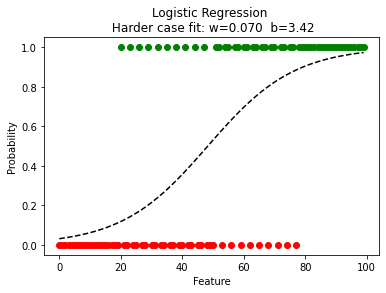

In [10]:
#Logistic regression
output2=[]
for inputs in x2:    
    output2.append(model(tf.expand_dims(inputs,axis=0)))
plt.figure()
plt.plot(x2[y2==0],y2[y2==0],'ro')
plt.plot(x2[y2>0],y2[y2>0],'go')
plt.plot(x2,np.stack(output2)[:,0,0],'k--')
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.title('Logistic Regression \n Harder case fit: w=' +str(model.get_weights()[0])[2:-7]+'  b='+str(model.get_weights()[1])[2:-5])


The probability provided here minimizes the loss (binary cross entropy) but it does not converge to perfect accuracy or zero loss.

# Hands-on: Creating a simple classification model

We will now begin to work on a more concrete model destined for our image classification task.

The task is to create a model that can take an image as input and output a probability.

In [11]:
# Creating a Classification model
import tensorflow as tf

def create_base_model(train_data,nLayers=4,nInitConvFilters=8,kernelSize=3):

  # Determine and store the shape of the data
  input_shape = (train_data.shape[1], train_data.shape[2], train_data.shape[3])
  # Create the model
  model = tf.keras.models.Sequential()

  #CNN layers with maxpooling
  for ii in range(nLayers):
    if ii ==0: #First Layer need to define an input size
      model.add(tf.keras.layers.Conv2D(nInitConvFilters*2**ii, kernel_size=(kernelSize, kernelSize), padding='same', activation='relu', input_shape=input_shape))
    else:
      model.add(tf.keras.layers.Conv2D(nInitConvFilters*2**ii, kernel_size=(kernelSize, kernelSize), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(nInitConvFilters*2**ii, kernel_size=(kernelSize, kernelSize), padding='same', activation='relu'))
    ## choose the best features via pooling
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  ## Reduce to 1 dimension for classification
  model.add(tf.keras.layers.Flatten())
  ## Fully connected to combine all features
  model.add(tf.keras.layers.Dense(nInitConvFilters*2**(ii+1), activation='relu'))
  ## Logistic Regression
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  # Display a model summary
  model.summary(100)
  return model

In [12]:
train_data=tf.zeros((1,128,128,1))
model=create_base_model(train_data)

# Compile the model
loss_function=tf.keras.losses.binary_crossentropy
learning_rate=0.001
optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
# Split data, define batches, number of epochs etc,
validation_split = 0.2
verbosity = 1
no_epochs=20
batch_size=10
# Fit model to data -> No data ! Error !
# history = model.fit(train_data, train_labels,
#             batch_size=batch_size,
#             epochs=no_epochs,
#             verbose=verbosity,
#             validation_split=validation_split)


Model: "sequential_1"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 conv2d (Conv2D)                             (None, 128, 128, 8)                     80             
                                                                                                    
 conv2d_1 (Conv2D)                           (None, 128, 128, 8)                     584            
                                                                                                    
 max_pooling2d (MaxPooling2D)                (None, 64, 64, 8)                       0              
                                                                                                    
 conv2d_2 (Conv2D)                           (None, 64, 64, 16)                      1168           
                                                                     

We have now created a model with about half a million parameters. 

Almost ready to go however we do not yet have the most important part ! 

`The data !` 

# Hands-on: Preparing the data and running the model

Data preparation may be one of the most difficult steps in machine learning.

Each dataset is different and highly specific to the project. Preparing it conveniently to learn the task at hand will probably take you more time than designing the model itself. 

Practical steps to go from DICOM files to ML ready data are described in the following section. 

### ACCESSING THE DATA

We retrieve the OCMR DICOM dataset from the Workshop's github.

The data is saved in the Downloads/Workshop/DICOMfiles folder.

The list of DICOM files is often provided in an apparently unhelpful format with names such as dicom_3001.dcm, dicom_3002.dcm, dicom_3003.dcm ...  

** - THIS NEEDS CHANGING WHEN UPDATING GITHUB REPOSITORY FOR CLASS**

In [13]:
#Get data from github repository
import os
def get_download_path():
    """Returns the default downloads path for linux or windows"""
    if os.name == 'nt':
        import winreg
        sub_key = r'SOFTWARE\Microsoft\Windows\CurrentVersion\Explorer\Shell Folders'
        downloads_guid = '{374DE290-123F-4565-9164-39C4925E467B}'
        with winreg.OpenKey(winreg.HKEY_CURRENT_USER, sub_key) as key:
            location = winreg.QueryValueEx(key, downloads_guid)[0]
        return location
    else:
        return os.path.join(os.path.expanduser('~'), 'Downloads')

downloadpath=get_download_path() #If for windows does not work please write out the folder you want to download the data to.
images_url = "https://media.githubusercontent.com/media/mrphys/MLinCHD_Workshop/WIP_Workshop2/Workshop2/data/DICOMfiles.zip"
!wget {images_url} -P {downloadpath}
tmp_path=downloadpath+'/DICOMfiles.zip'
image_path=downloadpath+'/Workshop/'
!unzip {tmp_path} -d {image_path}
image_path=downloadpath+'/Workshop/DICOMfiles/'

/bin/bash: /home/oj20/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
wget: /home/oj20/anaconda3/lib/libuuid.so.1: no version information available (required by wget)
Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/oj20/.wget-hsts'. HSTS will be disabled.
--2022-08-19 10:45:28--  https://media.githubusercontent.com/media/mrphys/MLinCHD_Workshop/WIP_Workshop2/Workshop2/data/DICOMfiles.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144017580 (137M) [application/zip]
Saving to: ‘/home/oj20/Downloads/DICOMfiles.zip.1’

DICOMfiles.zip.1    100%[===================>] 137.35M  55.4MB/s    in 2.5s    

2022-08-19 10:45:3

### READING THE DICOM DATA

Read all of the DICOM files (images and headers). At first these are stored into an unstructured list (as images sizes, etc are different/unknown at this stage).

Also store useful DICOM header fields - these can be used to allow us to store the data in a useful format. In this data this includes:

    PatientID - this is used to separate the different patients
    SeriesNumber - this is used to separate/order different slices from the same patient
    InstanceNumber - this is used to separate/order time points for each series/slice
    ProtocolName - this contains the label for the data type e.g. SAX, LAX or 4Ch

Note: this function also does some pre-processing of the original data so that it is all 128x128 matrix for simplicity later on. (This involves cropping of the data to make it square, resampling and normalizing contrast.)

The output is a python dictionary `data` containing:

    data['dataImage'] -> Images
    data['dataID'] -> PatientIDs
    data['dataType'] -> SAX or other
    data['dataSeriesNo'] -> Slice number
    data['dataInstanceNo'] -> Timepoint number

In [14]:
# Now collect ALL of the DICOM data, as well as relevant headers, and store in arrays (unsorted) 
import matplotlib.pylab as plt
import os, os.path
import math
import numpy as np
import tensorflow as tf
import pydicom as dicom
import tf_clahe

dataType = []
dataID = []
dataSeriesNo = []
dataInstanceNo = []
dataImage = []

imageSize = 128

for file in np.sort(os.listdir(image_path)):
  # Check whether file is in dcm format or not
  if file.endswith(".dcm"):
    if (len(dataType) % 200) == 0:
       print("reading file number: ", len(dataType) , " of ", len(os.listdir(image_path)), end='\r')
    file_path = f"{image_path}{file}"
    
    # call read text file function
    ds = dicom.dcmread(file_path)

    dataType.append(ds.ProtocolName)
    dataID.append(ds.PatientID[3:6]) #this is a 2 digit number, e.g. '1_' or '19'
    dataSeriesNo.append(ds.SeriesNumber)
    dataInstanceNo.append(ds.InstanceNumber)
    
    # process image data to ensure all data is square and resamle to 128x128 matrix
    inData = ds.pixel_array
    minSz = min(inData.shape[0], inData.shape[1])
    #first make it square
    startX = math.floor((inData.shape[0]-minSz)/2)
    startY = math.floor((inData.shape[1]-minSz)/2)

    image_resampled = inData[startX:startX+minSz, startY:startY+minSz, tf.newaxis]
    image_resampled = tf.image.resize(image_resampled, [imageSize,imageSize])
    
    image_preproc=tf_clahe.clahe(image_resampled/np.max(image_resampled)*256)/256
    dataImage.append(image_preproc)

#Dictionary structure
data=dict()
data['dataImage']=dataImage
data['dataID']=np.stack(dataID).astype(np.int16)
data['dataType']=dataType
data['dataSeriesNo']=np.stack(dataSeriesNo).astype(np.int16)
data['dataInstanceNo']=np.stack(dataInstanceNo).astype(np.int16)

## Define a function to assemble the selected data
A function is now defined to extract from the dictionary the images and corresponding labels for all patients.
In this exemple we will only take the central slice of the stacks of short axis and a single timepoint of the series. 
Although the function allows for the assembling of all data.

The output is 4 lists containing :

    SAXelements -> All short axis images
    SAXLabels -> Corresponding labels (all ones)
    nonSAXelements -> All non short axis images
    nonSAXLabels -> Corresponding labels (all zeros)

In [15]:
def assemble_dataset(data,indexes_time=[0],central_slice=1):
    uniqueIDs = np.unique(data['dataID'])
    dataID2=np.stack(data['dataID'])
    PatientsData = [[[] for i in range(len(uniqueIDs))] for i in range(2)]
    PatientsLabel = [[[]  for i in range(len(uniqueIDs))]for i in range(2)]
    imagecounter=0
    for ii,file in enumerate(np.sort(os.listdir(image_path))):
        if dataType[ii] == 'SAX':
            classificationLabel = 1
            for index_time in indexes_time:
                if data['dataInstanceNo'][ii]==index_time+1:
                            imagecounter=imagecounter+1
                            PatientsData[classificationLabel][dataID2.astype(np.int16)[ii]-1].append(data['dataImage'][ii])
        else:
            classificationLabel = 0
            for index_time in indexes_time:
                if data['dataInstanceNo'][ii]==index_time+1:
                        imagecounter=imagecounter+1
                        PatientsData[classificationLabel][dataID2.astype(np.int16)[ii]-1].append(data['dataImage'][ii])
    if central_slice==1:    
        SAXelements=[item[len(item)//2] for item in PatientsData[1] if item!=[] ]
    else:
        SAXelements = [item for sublist in PatientsData[1] for item in sublist]
    SAXLabels=np.ones((len(SAXelements),1))
    nonSAXelements = [item for sublist in PatientsData[0] for item in sublist]
    nonSAXLabels=np.zeros((len(nonSAXelements),1))    
    return SAXelements, SAXLabels, nonSAXelements, nonSAXLabels

## Assemble the data and split the machine learning sets

The assembling function is ran and the data is separated into :

    Training set : 60 %
    Validation set: 20 %
    Test set: rest

The lists are stacked into arrays of size:

    (nElements,size x=128, size y=128, nChannels=1) -> for images
    (nElements,1) -> for labels

In [20]:
# Assemble Dataset
SAXelements, SAXLabels, nonSAXelements, nonSAXLabels =assemble_dataset(data,indexes_time=[10])

# Split the dataset into training, validation and test set
train_perc=60/100
val_perc=20/100

TrainElements=SAXelements[:int(train_perc*len(SAXelements))]+nonSAXelements[:int(train_perc*len(nonSAXelements))]
train_labels=np.concatenate((SAXLabels[:int(train_perc*len(SAXelements))],nonSAXLabels[:int(train_perc*len(nonSAXelements))]),axis=0)

ValElements=SAXelements[int(train_perc*len(SAXelements)):int((train_perc+val_perc)*len(SAXelements))]+nonSAXelements[int(train_perc*len(nonSAXelements)):int((train_perc+val_perc)*len(nonSAXelements))]
val_labels=np.concatenate((SAXLabels[int(train_perc*len(SAXelements)):int((train_perc+val_perc)*len(SAXelements))],nonSAXLabels[int(train_perc*len(nonSAXelements)):int((train_perc+val_perc)*len(nonSAXelements))]),axis=0)

TestElements=SAXelements[int((train_perc+val_perc)*len(SAXelements)):]+nonSAXelements[int((train_perc+val_perc)*len(nonSAXelements)):]
test_labels=np.concatenate((SAXLabels[int((train_perc+val_perc)*len(SAXelements)):],nonSAXLabels[int((train_perc+val_perc)*len(nonSAXelements)):]),axis=0)

train_data=np.stack(TrainElements); val_data=np.stack(ValElements); test_data=np.stack(TestElements)
print('Total: SAX',len(SAXelements),'nonSAX',len(nonSAXelements),
      '\nTrain: SAX',len(SAXelements[:int(train_perc*len(SAXelements))]),'nonSAX',len(nonSAXelements[:int(train_perc*len(nonSAXelements))]),
      '\nValidation: SAX',len(SAXelements[int(train_perc*len(SAXelements)):int((train_perc+val_perc)*len(SAXelements))]),'nonSAX',len(nonSAXelements[int(train_perc*len(nonSAXelements)):int((train_perc+val_perc)*len(nonSAXelements))]),
       '\nTest: SAX',len(SAXelements[int((train_perc+val_perc)*len(SAXelements)):]),'nonSAX',len(nonSAXelements[int((train_perc+val_perc)*len(nonSAXelements)):]),
       '\n\nFormatted Image Sets Shapes (Train/val/test):\n', train_data.shape,'/', val_data.shape,'/', test_data.shape,
       '\nFormatted Label Sets Shapes (Train/val/test):\n', train_labels.shape,'/', val_labels.shape,'/', test_labels.shape)


Total: SAX 32 nonSAX 42 
Train: SAX 19 nonSAX 25 
Validation: SAX 6 nonSAX 8 
Test: SAX 7 nonSAX 9 

Formatted Image Sets Shapes (Train/val/test):
 (44, 128, 128, 1) / (14, 128, 128, 1) / (16, 128, 128, 1) 
Formatted Label Sets Shapes (Train/val/test):
 (44, 1) / (14, 1) / (16, 1)


## Don't Forget to look at the images !

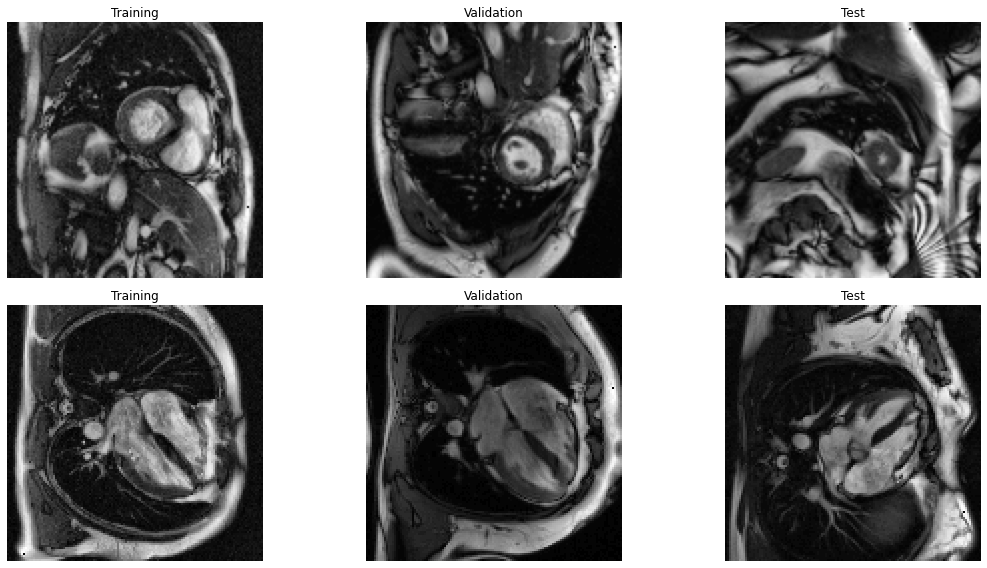

In [22]:
#Plot one image from each set
fig=plt.figure(figsize=(16,8))
plt.subplot(231)
plt.imshow(train_data[0,:,:,0],cmap='gray')
plt.axis('off')
plt.title('Training')
plt.subplot(232)
plt.imshow(val_data[0,:,:,0],cmap='gray')
plt.axis('off')
plt.title('Validation')
plt.subplot(233)
plt.imshow(test_data[0,:,:,0],cmap='gray')
plt.axis('off')
plt.title('Test')
plt.subplot(234)
plt.imshow(train_data[-1,:,:,0],cmap='gray')
plt.axis('off')
plt.title('Training')
plt.subplot(235)
plt.imshow(val_data[-1,:,:,0],cmap='gray')
plt.axis('off')
plt.title('Validation')
plt.subplot(236)
plt.imshow(test_data[-1,:,:,0],cmap='gray')
plt.axis('off')
plt.title('Test')
fig.tight_layout()

## Ready for the task at hand

In this section, we return to the model creation and this time we actually perform the fitting with the preprocessed data.

In [24]:
tf.random.set_seed(1)
np.random.seed(1)
model=create_base_model(train_data)


# Compile the model
loss_function=tf.keras.losses.binary_crossentropy
learning_rate=0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
# Define batches, number of epochs etc,
verbosity = 1
no_epochs=10
batch_size=1
# Fit model to data
history = model.fit(train_data, train_labels,
            validation_data=(val_data,val_labels),
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            shuffle=True)

Model: "sequential_2"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 conv2d_8 (Conv2D)                           (None, 128, 128, 8)                     80             
                                                                                                    
 conv2d_9 (Conv2D)                           (None, 128, 128, 8)                     584            
                                                                                                    
 max_pooling2d_4 (MaxPooling2D)              (None, 64, 64, 8)                       0              
                                                                                                    
 conv2d_10 (Conv2D)                          (None, 64, 64, 16)                      1168           
                                                                     

## Evaluating the model

The model is classically evaluated on a separate test set once after metrics on the training and validation set are convincing.

Here we look at the training and validation loss.

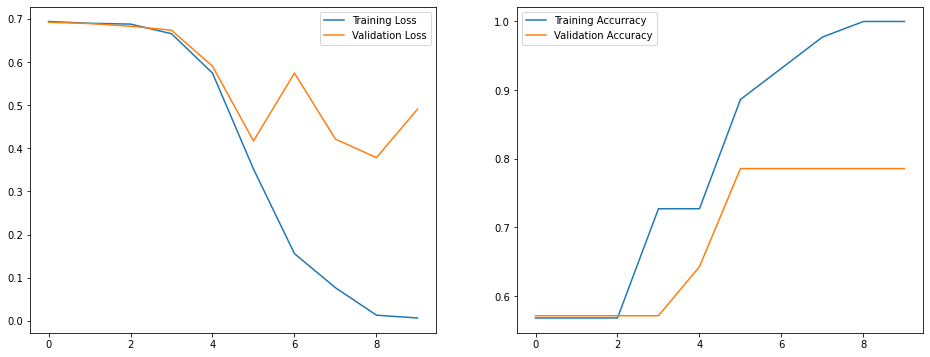

In [25]:
fig = plt.figure(figsize=(16,6))
plt.subplot(121)  # Plot the training curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
leg = plt.legend()
plt.subplot(122)
# Plot the training curves
plt.plot(history.history['accuracy'], label='Training Accurracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
leg = plt.legend()


1/1 [==============================] - 0s 16ms/step - loss: 0.2206 - accuracy: 0.8750


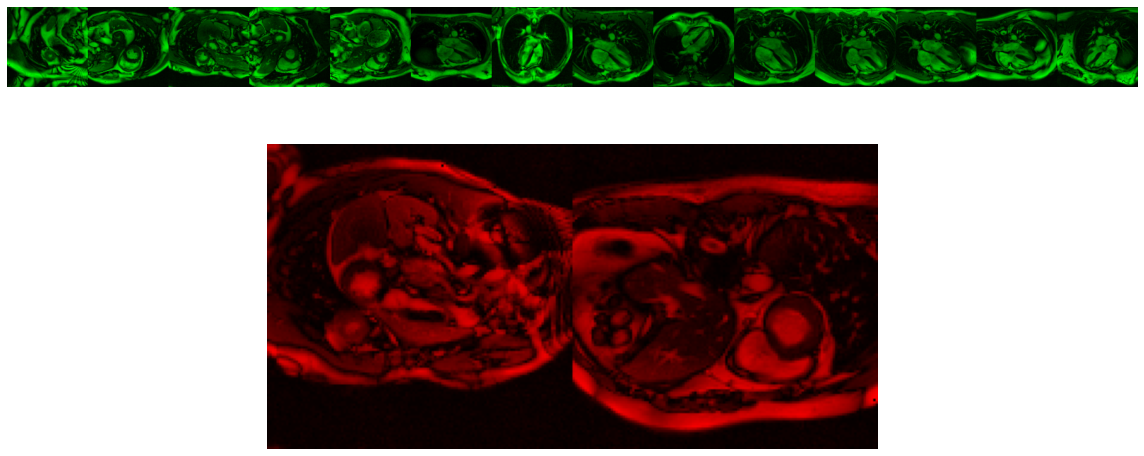

In [26]:
#Plot Test set (green correct, red incorrect)
## Evaluate the model on the test set
valeval= model.evaluate(val_data,val_labels)
testeval = model.evaluate(test_data,test_labels)
results = model.predict(test_data)

#Visualize results
fig=plt.figure(figsize=(16,8))
plt.subplot(211)
indexes=np.squeeze((test_labels>0.5)==(results>0.5))
PositiveImages=np.reshape(test_data[indexes,:,:,0],(-1,128))
PositiveImages=np.stack((np.zeros(PositiveImages.shape),PositiveImages,np.zeros(PositiveImages.shape)),axis=-1)
plt.imshow(np.transpose(PositiveImages,axes=(1,0,2)))
plt.axis('off')
plt.subplot(212)
indexes=np.squeeze((test_labels>0.5)!=(results>0.5))
NegativeImages=np.reshape(test_data[indexes,:,:],(-1,128))
NegativeImages=np.stack((NegativeImages,np.zeros(NegativeImages.shape),np.zeros(NegativeImages.shape)),axis=-1)
plt.imshow(np.transpose(NegativeImages,axes=(1,0,2)))
plt.axis('off')
fig.tight_layout()

## Conclusion

In this tutorial, we learned a few basic steps for image classification. 

1. We performed a logistic regression using Tensorflow, 
2. We created a simple CNN model for feature extraction and image classification 
3. We prepared a small machine learning dataset from a set of DICOM files obtained from the OCMR dataset.
4. Finally we fitted and evaluated the model.

In the next session we will look into avoiding pitfalls, improving performance and reducing overfitting of the model using a few classical ML methods.

## In the next lesson: Improving performance / Reducing overfitting ! 